Circular Newtonian Orbits


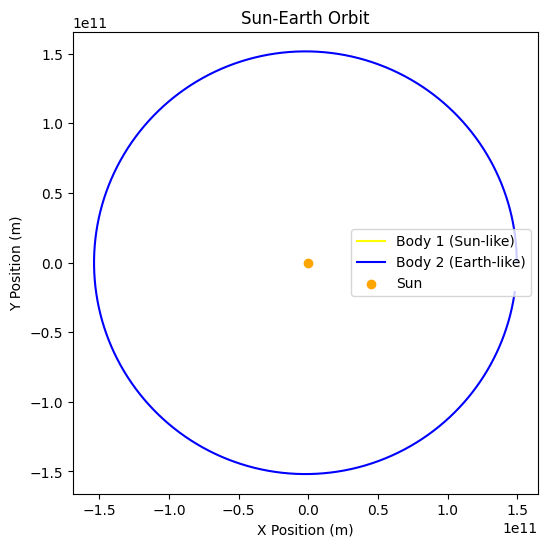

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)

class Body:
    def __init__(self, mass, position, velocity):
        self.mass = mass
        self.position = np.array(position, dtype=np.float64)  # Ensure position is float64
        self.velocity = np.array(velocity, dtype=np.float64)  # Ensure velocity is float64
        self.acceleration = np.zeros(2, dtype=np.float64)  # Ensure acceleration is float64
        

# Calculate gravitational force 
def gravitational_force(body1, body2):
    r = body2.position - body1.position
    distance = np.linalg.norm(r)
    if distance == 0:
        return np.zeros(2)
    force_magnitude = G * body1.mass * body2.mass / distance**2
    force_direction = r / distance  # Unit vector
    return force_magnitude * force_direction

# Update the bodies' positions and velocities
def update_system(bodies, dt):
    for body in bodies:
        # Reset acceleration
        body.acceleration = np.zeros(2)
    
    # Compute the accelerations due to gravitational forces
    for i, body1 in enumerate(bodies):
        for j, body2 in enumerate(bodies):
            if i != j:
                body1.acceleration += gravitational_force(body1, body2) / body1.mass


    for body in bodies:
        body.velocity += body.acceleration * dt
        body.position += body.velocity * dt



# Create bodies (mass in kg, position in meters, velocity in m/s)
body1 = Body(1.989e30, [0, 0], [0, 0])  # Sun-like body at the origin (mass, position, velocity)
body2 = Body(5.972e24, [1.496e11, 0], [0, 30000])  # Earth-like body with elliptical velocity

# List of bodies in the system
bodies = [body1, body2]


# List of bodies in the system
bodies = [body1, body2]

# Time parameters
dt = 10000  # Time step in seconds
total_time = 365 * 24 * 60 * 60  # One year in seconds
steps = int(total_time / dt)

# Create arrays for plotting
positions1 = []
positions2 = []

# Simulation loop
for step in range(steps):
    update_system(bodies, dt)
    
    # Record positions for plotting
    positions1.append(bodies[0].position.copy())  # Sun position
    positions2.append(bodies[1].position.copy())  # Earth position

# Convert positions to numpy arrays for plotting
positions1 = np.array(positions1)
positions2 = np.array(positions2)

# Plot the trajectories
plt.figure(figsize=(6, 6))
plt.plot(positions1[:, 0], positions1[:, 1], label="Body 1 (Sun-like)", color='yellow')
plt.plot(positions2[:, 0], positions2[:, 1], label="Body 2 (Earth-like)", color='blue')
plt.scatter([0], [0], color='orange', label="Sun", zorder=5)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Sun-Earth Orbit")
plt.legend()
plt.axis('equal')
plt.show()


Keplerian Orbits


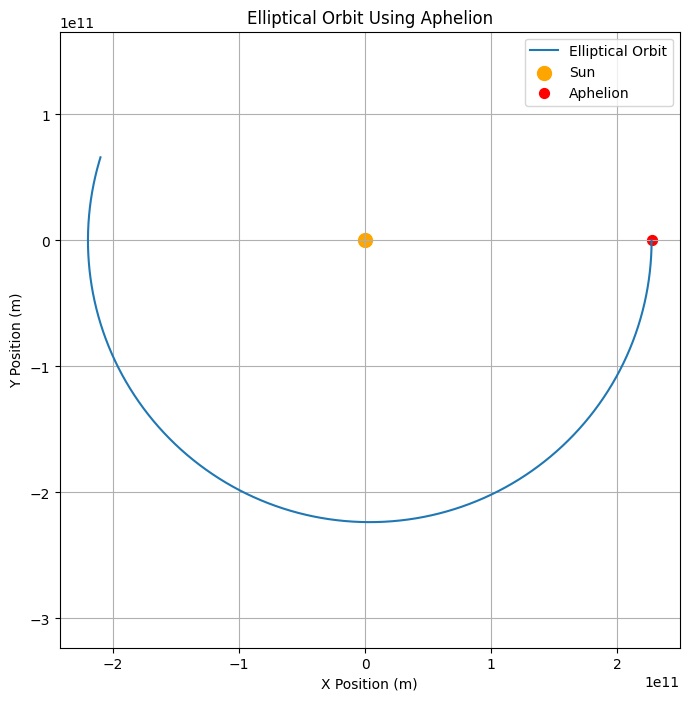

Aphelion Distance: 2.27e+11 m (1.520 AU)
Perihelion Distance: 2.20e+11 m (1.470 AU)
Semi-Major Axis: 2.24e+11 m (1.495 AU)
Velocity at Aphelion: 2.40e+04 m/s


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)
AU = 1.496e11  # Astronomical Unit (m)

# Input parameters
r_aphelion = 1.52 * AU  # Aphelion distance (Mars' aphelion for example)
eccentricity = 0.0167 # Example eccentricity (Mars)

# Calculate semi-major axis
semi_major_axis = r_aphelion / (1 + eccentricity)

# Calculate perihelion distance
r_perihelion = semi_major_axis * (1 - eccentricity)

# Calculate velocity at aphelion using vis-viva equation
v_aphelion = np.sqrt(G * M_sun * (2 / r_aphelion - 1 / semi_major_axis))

# Initialize position and velocity
position = np.array([r_aphelion, 0])  # Start at aphelion
velocity = np.array([0, -v_aphelion])  # Perpendicular velocity at aphelion

# Time step and simulation time
dt = 3600  # Time step (1 hour)
total_time = 365 * 24 * 3600  # Simulate 1 year
steps = int(total_time / dt)

# Store positions for plotting
positions = []

# Simulation loop
for _ in range(steps):
    r = np.linalg.norm(position)
    acceleration = -G * M_sun * position / r**3
    velocity += acceleration * dt
    position += velocity * dt
    positions.append(position.copy())

# Convert positions to array
positions = np.array(positions)

# Plot the orbit
plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0], positions[:, 1], label="Elliptical Orbit")
plt.scatter(0, 0, color="orange", label="Sun", s=100)
plt.scatter(r_aphelion, 0, color="red", label="Aphelion", s=50)
plt.title("Elliptical Orbit Using Aphelion")
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

# Print orbital details
print(f"Aphelion Distance: {r_aphelion:.2e} m ({r_aphelion / AU:.3f} AU)")
print(f"Perihelion Distance: {r_perihelion:.2e} m ({r_perihelion / AU:.3f} AU)")
print(f"Semi-Major Axis: {semi_major_axis:.2e} m ({semi_major_axis / AU:.3f} AU)")
print(f"Velocity at Aphelion: {v_aphelion:.2e} m/s")


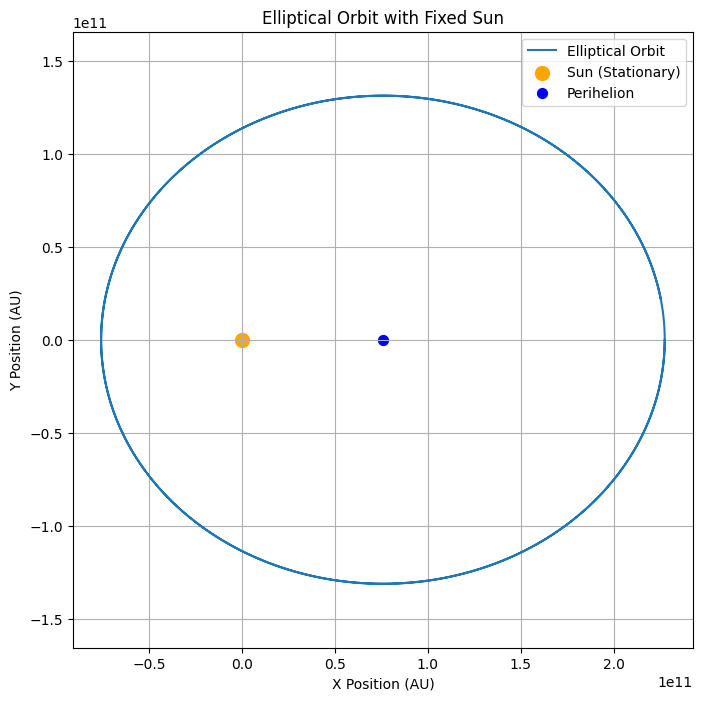

Aphelion Distance: 2.27e+11 m (1.520 AU)
Perihelion Distance: 7.58e+10 m (0.507 AU)
Semi-Major Axis: 1.52e+11 m (1.013 AU)
Velocity at Aphelion: 1.71e+04 m/s


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)
AU = 1.496e11  # Astronomical Unit (m)

# Input parameters
r_aphelion = 1.52 * AU  # Aphelion distance
eccentricity = 0.5  # Higher eccentricity for a visibly elliptical orbit

# Calculate semi-major axis and perihelion distance
semi_major_axis = r_aphelion / (1 + eccentricity)
r_perihelion = semi_major_axis * (1 - eccentricity)

# Calculate velocity at aphelion using the vis-viva equation
v_aphelion = np.sqrt(G * M_sun * (2 / r_aphelion - 1 / semi_major_axis))

# Initialize position and velocity
position = np.array([r_aphelion, 0])  # Start at aphelion
velocity = np.array([0, -v_aphelion])  # Perpendicular velocity at aphelion

# Time step and simulation parameters
dt = 3600  # Time step (1 hour)
total_time = 2 * 365 * 24 * 3600  # Simulate 2 years for a complete orbit
steps = int(total_time / dt)

# Store positions for plotting
positions = []

# Simulation loop
for _ in range(steps):
    r = np.linalg.norm(position)  # Distance from the Sun
    acceleration = -G * M_sun * position / r**3  # Gravitational acceleration
    velocity += acceleration * dt
    position += velocity * dt
    positions.append(position.copy())

# Convert positions to array
positions = np.array(positions)

# Plot the orbit
plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0], positions[:, 1], label="Elliptical Orbit")
plt.scatter(0, 0, color="orange", label="Sun (Stationary)", s=100)
plt.scatter(r_perihelion, 0, color="blue", label="Perihelion", s=50)
plt.title("Elliptical Orbit with Fixed Sun")
plt.xlabel("X Position (AU)")
plt.ylabel("Y Position (AU)")
plt.axis("equal")
plt.legend()
plt.grid(True)
plt.show()

# Print orbital details
print(f"Aphelion Distance: {r_aphelion:.2e} m ({r_aphelion / AU:.3f} AU)")
print(f"Perihelion Distance: {r_perihelion:.2e} m ({r_perihelion / AU:.3f} AU)")
print(f"Semi-Major Axis: {semi_major_axis:.2e} m ({semi_major_axis / AU:.3f} AU)")
print(f"Velocity at Aphelion: {v_aphelion:.2e} m/s")


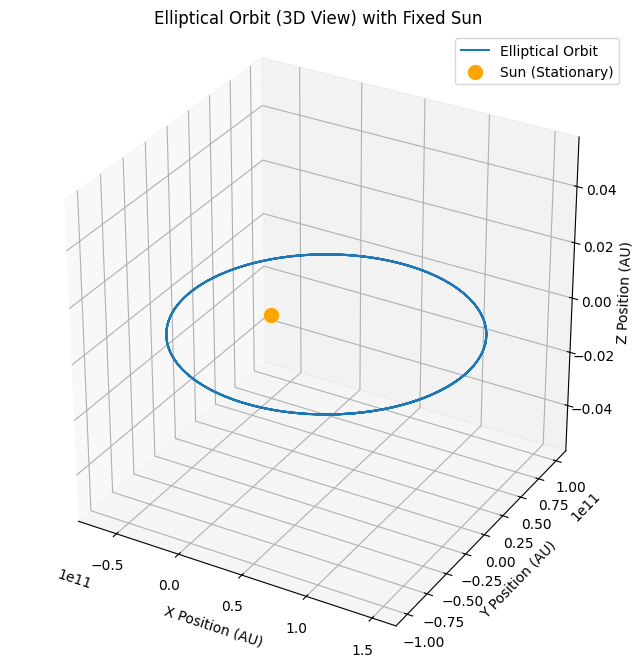

Aphelion Distance: 1.52e+11 m (1.017 AU)
Perihelion Distance: 6.52e+10 m (0.436 AU)
Semi-Major Axis: 1.09e+11 m (0.726 AU)
Velocity at Aphelion: 2.29e+04 m/s
Position data saved as 'orbit_path.txt'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)
AU = 1.496e11  # Astronomical Unit (m)

# Input parameters
eccentricity = 0.4  # Higher eccentricity for a visibly elliptical orbit

# Aphelion and perihelion distances
r_aphelion = 1.0166125 * AU  # Aphelion distance in meters
# Semi-major axis calculation
semi_major_axis = r_aphelion / (1 + eccentricity)
r_perihelion = semi_major_axis * (1 - eccentricity)

# Calculate velocity at aphelion using the vis-viva equation
v_aphelion = np.sqrt(G * M_sun * (2 / r_aphelion - 1 / semi_major_axis))

# Initialize position and velocity
position = np.array([r_aphelion, 0, 0])  # Start at aphelion (in 3D space)
velocity = np.array([0, -v_aphelion, 0])  # Perpendicular velocity at aphelion

# Time step and simulation parameters
dt = 3600  # Time step (1 hour)
total_time = 2 * 365 * 24 * 3600  # Simulate 2 years for a complete orbit
steps = int(total_time / dt)

# Store positions for plotting
positions = []

# Simulation loop
for _ in range(steps):
    r = np.linalg.norm(position)  # Distance from the Sun
    acceleration = -G * M_sun * position / r**3  # Gravitational acceleration
    velocity += acceleration * dt
    position += velocity * dt
    positions.append(position.copy())

# Convert positions to array
positions = np.array(positions)

# Save positions as path integral (coordinates)
np.savetxt('orbit_path.txt', positions)

# Plot the orbit in 3D axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], label="Elliptical Orbit")
ax.scatter(0, 0, 0, color="orange", label="Sun (Stationary)", s=100)

# Set labels
ax.set_xlabel("X Position (AU)")
ax.set_ylabel("Y Position (AU)")
ax.set_zlabel("Z Position (AU)")

# Set equal aspect ratio for all axes
ax.set_box_aspect([1, 1, 1])  # Equal scaling for X, Y, Z axes

# Title and grid
ax.set_title("Elliptical Orbit (3D View) with Fixed Sun")
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

# Print orbital details
print(f"Aphelion Distance: {r_aphelion:.2e} m ({r_aphelion / AU:.3f} AU)")
print(f"Perihelion Distance: {r_perihelion:.2e} m ({r_perihelion / AU:.3f} AU)")
print(f"Semi-Major Axis: {semi_major_axis:.2e} m ({semi_major_axis / AU:.3f} AU)")
print(f"Velocity at Aphelion: {v_aphelion:.2e} m/s")
print("Position data saved as 'orbit_path.txt'")


SIMULATION OF CIRCULAR NEWTONIAN ORBIT

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


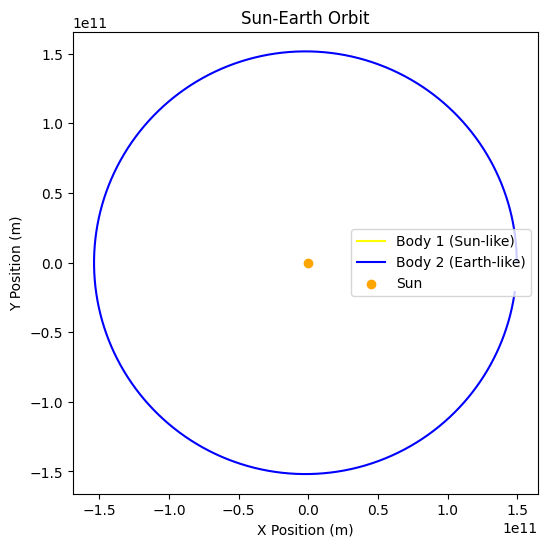

In [5]:
import pygame
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)
M_earth = 5.972e24  # Mass of the Earth (kg)
a_earth = 1.496e11  # Semi-major axis of Earth's orbit (meters)
e_earth = 0.0167  # Eccentricity of Earth's orbit
dt = 2 * 24 * 60 * 60  # 2 days in seconds (time step)

# Initialize Pygame
pygame.init()

# Window settings
width, height = 800, 800
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Multi-Body Simulation with Earth's Orbit")

# Colors
SUN_COLOR = (255, 255, 0)
EARTH_COLOR = (0, 0, 255)
ORBIT_COLOR = (100, 100, 100)


# Function to calculate true anomaly using Kepler's equation (numerically solved)
def kepler_eq(M, e):
    E = M  
    delta = 1e-6
    while True:
        f = E - e * np.sin(E) - M
        f_prime = 1 - e * np.cos(E)
        E_new = E - f / f_prime
        if np.abs(E_new - E) < delta:
            break
        E = E_new
    return 2 * np.arctan(np.sqrt((1 + e) / (1 - e)) * np.tan(E / 2))

# Initial position and velocity of Earth (starting at perihelion)
position = np.array([a_earth * (1 - e_earth), 0])  
velocity = np.array([0, np.sqrt(G * M_sun * (2 / (a_earth * (1 - e_earth)) - 1 / a_earth))])  

# Set up the Sun and Earth objects
sun_pos = (width // 2, height // 2)  # Center of the window
earth_radius = 10  # Earth radius on screen (smaller value)
orbit_radius = 300  # Adjust this to fit the screen

earth_path = []

frames = 0

# Main game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Mean anomaly increases linearly with time
    M = 2 * np.pi * frames / 365  

    # Solve for true anomaly using Kepler's equation
    theta = kepler_eq(M, e_earth)

    # Calculate the distance from the Sun using the semi-major axis and eccentricity
    r = a_earth * (1 - e_earth**2) / (1 + e_earth * np.cos(theta))

    # Calculate the position of Earth in the elliptical orbit
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Scale Earth's position to fit into the Pygame window (centered at the Sun)
    earth_pos = (sun_pos[0] + int(x / 1e9), sun_pos[1] + int(y / 1e9))  # Scale to fit in window size

    # Append the current Earth position to the path list
    earth_path.append(earth_pos)

    # Clear the screen
    screen.fill((0, 0, 0))

    # Draw the Sun
    pygame.draw.circle(screen, SUN_COLOR, sun_pos, 30)

    # Draw the Earth
    pygame.draw.circle(screen, EARTH_COLOR, earth_pos, earth_radius)

    # Draw the Earth's path (the trail behind Earth)
    if len(earth_path) > 1:
        pygame.draw.lines(screen, ORBIT_COLOR, False, earth_path, 1)  # False means open path

    # Increment the frame count (will loop after one full orbit)
    frames += 1
    if frames > 365:  # Reset after a full orbit (365 days)
        frames = 0

    # Update the display
    pygame.display.update()

    # Control the speed of the simulation
    pygame.time.delay(30)  # Adjust this to make the simulation faster or slower

pygame.quit()

plt.figure(figsize=(6, 6))
plt.plot(positions1[:, 0], positions1[:, 1], label="Body 1 (Sun-like)", color='yellow')
plt.plot(positions2[:, 0], positions2[:, 1], label="Body 2 (Earth-like)", color='blue')
plt.scatter([0], [0], color='orange', label="Sun", zorder=5)
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Sun-Earth Orbit")
plt.legend()
plt.axis('equal')
plt.show()




Simulation of Eccentric Orbit

In [6]:
import pygame
import numpy as np

G = 10.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # Mass of the Sun (kg)
AU = 1.496e11  # Astronomical Unit (m)

# Input parameters for Earth's orbit
r_aphelion = 1.52 * AU  # Aphelion distance (1.52 AU)
eccentricity = 0.5  # Orbital eccentricity for a visibly elliptical orbit

# Calculate semi-major axis and perihelion distance
semi_major_axis = r_aphelion / (1 + eccentricity)
r_perihelion = semi_major_axis * (1 - eccentricity)

# Calculate velocity at aphelion using the vis-viva equation
v_aphelion = np.sqrt(G * M_sun * (2 / r_aphelion - 1 / semi_major_axis))

# Initialize position and velocity of Earth at aphelion
position = np.array([r_aphelion, 0])  # Start at aphelion
velocity = np.array([0, -v_aphelion])  # Perpendicular velocity at aphelion

# Time step and simulation parameters
dt = 3600  # Time step (1 hour)
total_time = 2 * 365 * 24 * 3600  # Simulate 2 years (complete orbit)
steps = int(total_time / dt)

# Pygame initialization
pygame.init()

# Window settings
width, height = 1280, 720
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Earth's Orbit around the Sun")

# Colors
SUN_COLOR = (255, 255, 0)
EARTH_COLOR = (0, 0, 255)
ORBIT_COLOR = (100, 100, 100)
TEXT_COLOR = (255, 255, 255)

# Sun position (center of the window)
sun_pos = np.array([width // 2, height // 2])


scale = 5e8  

earth_path = []

font = pygame.font.SysFont(None, 24)

# Main simulation loop
running = True
frame = 0
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Gravitational acceleration
    r = np.linalg.norm(position)  # Distance from the Sun
    acceleration = -G * M_sun * position / r**3  # Gravitational acceleration
    velocity += acceleration * dt  # Update velocity based on acceleration
    position += velocity * dt  # Update position based on velocity

    # Convert Earth's position to the window's coordinates (scale to fit)
    earth_pos = sun_pos + np.array([int(position[0] / scale), int(position[1] / scale)])

    # Store Earth's position for the path
    earth_path.append(earth_pos)

    # Clear the screen
    screen.fill((0, 0, 0))

    # Draw the Sun
    pygame.draw.circle(screen, SUN_COLOR, sun_pos, 30)

    # Draw the Earth
    pygame.draw.circle(screen, EARTH_COLOR, earth_pos, 10)

    # Draw the Earth's path (orbit trail)
    if len(earth_path) > 1:
        pygame.draw.lines(screen, ORBIT_COLOR, False, earth_path, 1)  # Draw orbit

    # Display information in the top-left corner
    distance_text = font.render(f"Distance: {r / AU:.2f} AU", True, TEXT_COLOR)
    velocity_text = font.render(f"Velocity: {np.linalg.norm(velocity) / 1000:.2f} km/s", True, TEXT_COLOR)
    position_text = font.render(f"Position: ({position[0] / AU:.2f} AU, {position[1] / AU:.2f} AU)", True, TEXT_COLOR)

    screen.blit(distance_text, (10, 10))
    screen.blit(velocity_text, (10, 40))
    screen.blit(position_text, (10, 70))

    # Increment the frame counter
    frame += 1
    if frame > steps:  # Reset after one full orbit
        frame = 0
        earth_path.clear()

    # Update the display
    pygame.display.update()

    # Control the speed of the simulation
    pygame.time.delay(2)  # Adjust this to control the simulation speed

pygame.quit()
